In [91]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Load the dataset**

In [92]:
df = pd.read_csv("Spotify_Youtube.csv")
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [93]:
df.head(3)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,1,1,6,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,Official HD Video for Gorillaz' fantastic trac...,True,True,1040234854
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,1,1,8,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,The official video for Gorillaz - Rhinestone E...,True,True,310083733
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,1,1,1,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,63063467


Data Preprocessing

In [94]:
pd.DataFrame(df).isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [95]:

columns_to_drop = ['Unnamed: 0', 'Url_spotify', 'Uri', 'Url_youtube', 'Description']

df = df.drop(columns=columns_to_drop)
df.head(3)


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,1,1,6,-7,0,0,...,139,222640,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221,6220896,169907,True,True,1040234854
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,1,1,8,-6,0,0,...,93,200173,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645,1079128,31003,True,True,310083733
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,1,1,1,-4,0,0,...,108,215150,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055,282142,7399,True,True,63063467


In [96]:
df.shape

(20718, 23)

In [97]:
df['Artist'] = df['Artist'].apply(lambda x: x.encode('utf-8').decode('utf-8', 'ignore'))

df['Artist'].nunique()

2079

In [98]:
test_rows = df[df['Artist'].isin(['The Beatles', '2Pac', 'Black Sabbath', 'Led Zeppelin','Michael Jackson', 'Elvis Presley', 'Elton John', ''])].copy()

# Remove the selected rows from the main DataFrame
df = df[~df['Artist'].isin(['The Beatles', 'Pink Floyd', 'Black Sabbath', 'Led Zeppelin'])]

# Display the DataFrames
print("\nSelected Rows:")
print(test_rows.shape)


Selected Rows:
(70, 23)


In [99]:
df_cleaned = df.dropna()
df_cleaned.shape

(19526, 23)

In [100]:
pd.DataFrame(df_cleaned).isna().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
dtype: int64

In [101]:
pd.set_option('display.float_format', '{:.0f}'.format)

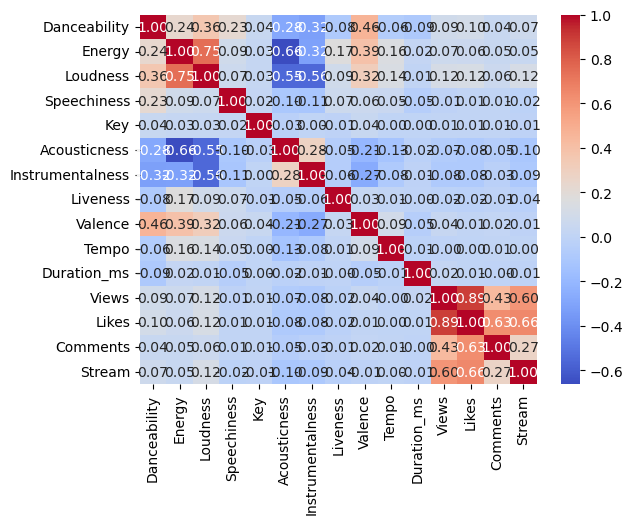

In [102]:
correlation_matrix = df_cleaned[['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Key','Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [103]:
df_cleaned.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [104]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19526 entries, 0 to 20717
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19526 non-null  object 
 1   Track             19526 non-null  object 
 2   Album             19526 non-null  object 
 3   Album_type        19526 non-null  object 
 4   Danceability      19526 non-null  float64
 5   Energy            19526 non-null  float64
 6   Key               19526 non-null  float64
 7   Loudness          19526 non-null  float64
 8   Speechiness       19526 non-null  float64
 9   Acousticness      19526 non-null  float64
 10  Instrumentalness  19526 non-null  float64
 11  Liveness          19526 non-null  float64
 12  Valence           19526 non-null  float64
 13  Tempo             19526 non-null  float64
 14  Duration_ms       19526 non-null  float64
 15  Title             19526 non-null  object 
 16  Channel           19526 non-null  object 
 17

In [105]:
df_cleaned.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Standardize the features
scaler = StandardScaler()
df_scaled_userstats = scaler.fit_transform(df_cleaned[['Views', 'Likes', 'Stream']])
# df_scaled_musicstats = scaler.fit_transform(df_cleaned[['Danceability', 'Energy',
#        'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
#        'Liveness', 'Valence', 'Tempo']])

/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/prasadpilankar/anaconda3/lib/pyth

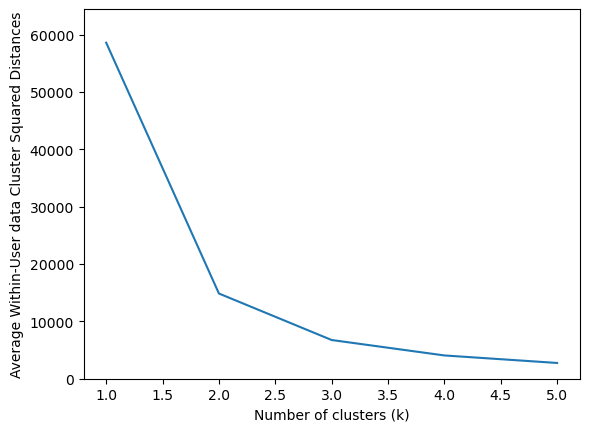

In [107]:
inertia = []
for n_clusters in range(1, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_scaled_userstats)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 6), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-User data Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/ks/9fg9l6k154g14j73zt0d4xw00000gn/T/ipykernel_4752/1281444173.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



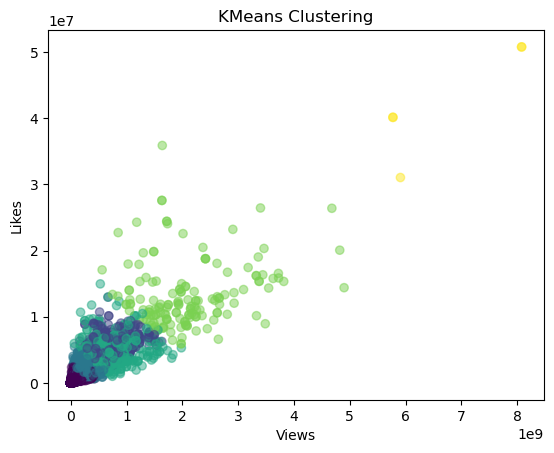

,Album,Views,Likes,Stream,Comments,ClusterStat1
0,Demon Days,693555221,6220896,1040234854,169907,1
1,Plastic Beach,72011645,1079128,310083733,31003,2
2,New Gold (feat. Tame Impala and Bootie Brown),8435055,282142,63063467,7399,0
3,Plastic Beach,211754952,1788577,434663559,55229,2
4,Gorillaz,618480958,6197318,617259738,155930,3
...,...,...,...,...,...,...
20713,JUST DANCE HARDSTYLE,71678,1113,9227144,0,0
20714,SET FIRE TO THE RAIN HARDSTYLE,164741,2019,10898176,0,0
20715,OUTSIDE HARDSTYLE SPED UP,35646,329,6226110,0,0
20716,ONLY GIRL HARDSTYLE,6533,88,6873961,0,0


In [108]:
# Apply KMeans clustering
num_clusters = 6  # You can adjust the number of clusters based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=1)
df_cleaned['ClusterStat1'] = kmeans.fit_predict(df_scaled_userstats)

# Visualize the clusters
plt.scatter(df_cleaned['Views'], df_cleaned['Likes'], c=df_cleaned['ClusterStat1'], cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

# Display the resulting DataFrame with cluster labels and custom classification
df_cleaned[['Album', 'Views', 'Likes', 'Stream', 'Comments','ClusterStat1']]


In [109]:
df_cleaned.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'ClusterStat1'],
      dtype='object')

In [110]:

mean_df = df_cleaned['Stream'].groupby(df_cleaned['ClusterStat1']).mean() 
mean_df

ClusterStat1
0     54190072
1   1204780242
2    355775355
3    375833115
4   1234957739
5   1883542169
Name: Stream, dtype: float64

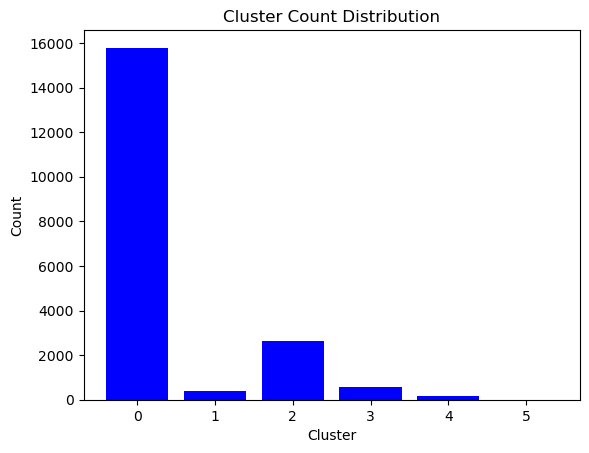

In [111]:
popularity_counts = df_cleaned['ClusterStat1'].value_counts()


plt.bar(popularity_counts.index, popularity_counts.values, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Count Distribution')
plt.show()

In [112]:

name_mapper = {5: 'High-popularity',
               4: 'High-popularity',
               1: 'High-popularity',
               3:'Medium-popularity',
               2:'Medium-popularity',
               0:'Low-popularity'}

df_cleaned.loc[:, 'Popularity_Index'] = df_cleaned['ClusterStat1'].map(name_mapper)
df_cleaned.shape

/var/folders/ks/9fg9l6k154g14j73zt0d4xw00000gn/T/ipykernel_4752/2332327855.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(19526, 25)

In [113]:
import pandas as pd
import numpy as np

cluster_ranges = df_cleaned.groupby('ClusterStat1')[['Stream']].agg(lambda x: np.min(x))

cluster_ranges.columns = ['Stream Min']

# Display the result
print(cluster_ranges)

              Stream Min
ClusterStat1            
0                   6574
1              784195555
2                6565704
3                  24160
4               18298540
5             1506598267


In [114]:
popularity_counts = df_cleaned['ClusterStat1'].value_counts()

print(popularity_counts)

ClusterStat1
0    15785
2     2630
3      562
1      387
4      157
5        5
Name: count, dtype: int64


In [115]:
import pandas as pd
import numpy as np

#add clusters with the popular songs only
grouped_clusters = [1, 2, 3, 4, 5]

df_cleaned['Popular'] = df_cleaned['ClusterStat1'].isin(grouped_clusters)

print(df_cleaned[df_cleaned['Popular'] == True].shape[0])

3741


/var/folders/ks/9fg9l6k154g14j73zt0d4xw00000gn/T/ipykernel_4752/2184307313.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
df_cleaned.head(5)

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Channel,Views,Likes,Comments,Licensed,official_video,Stream,ClusterStat1,Popularity_Index,Popular
0,Gorillaz,Feel Good Inc.,Demon Days,album,1,1,6,-7,0,0,...,Gorillaz,693555221,6220896,169907,True,True,1040234854,1,High-popularity,True
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,1,1,8,-6,0,0,...,Gorillaz,72011645,1079128,31003,True,True,310083733,2,Medium-popularity,True
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,1,1,1,-4,0,0,...,Gorillaz,8435055,282142,7399,True,True,63063467,0,Low-popularity,False
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,1,1,2,-6,0,0,...,Gorillaz,211754952,1788577,55229,True,True,434663559,2,Medium-popularity,True
4,Gorillaz,Clint Eastwood,Gorillaz,album,1,1,10,-9,0,0,...,Gorillaz,618480958,6197318,155930,True,True,617259738,3,Medium-popularity,True


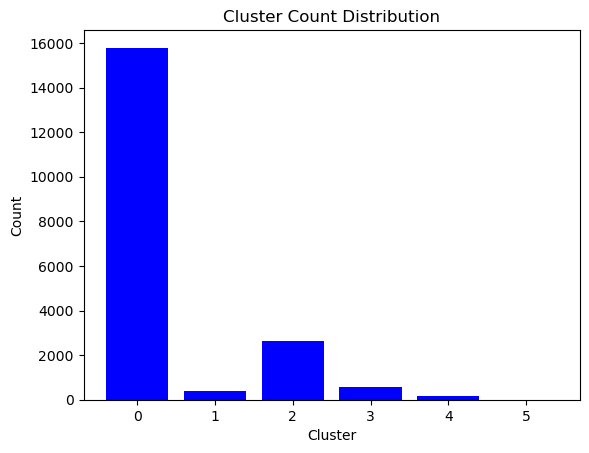

In [117]:
popularity_counts = df_cleaned['ClusterStat1'].value_counts()

plt.bar(popularity_counts.index, popularity_counts.values, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Count Distribution')
plt.show()

In [118]:
popularity_counts = df_cleaned['Popularity_Index'].value_counts()

print(popularity_counts)

Popularity_Index
Low-popularity       15785
Medium-popularity     3192
High-popularity        549
Name: count, dtype: int64


In [119]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go


num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

num_cols = num_cols.drop(['Stream', 'Comments', 'Likes', 'Views'])


scaler = StandardScaler()


df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[num_cols]), columns=num_cols)


df_scaled['Popularity_Index'] = df_cleaned['Popularity_Index']


traces = []

for cat in df_scaled['Popularity_Index'].unique():
    data = df_scaled[df_scaled['Popularity_Index'] == cat][num_cols].mean().tolist()
    trace = go.Scatterpolar(
        r=data + data[:1],
        theta=num_cols.tolist() + [num_cols[0]],
        fill='toself',
        name=cat
    )
    traces.append(trace)

# Create the layout
layout = go.Layout(
    polar=dict(
        radialaxis=dict(visible=True),
    ),
    showlegend=True,
    title='Features Radar Plot by Popularity Group '
)

# Create the figure
fig = go.Figure(data=traces, layout=layout)

# Show the figure
fig.show()


#Plot the clusters distribution by Spotify stream mean
df_cleaned.groupby('ClusterStat1')['Stream'].mean().sort_values().plot(kind='bar'
                                                                     , figsize=(10,5)
                                                                     , title='Average Spotify Streams by Popularity Cluster'
                                                                     )
plt.show()

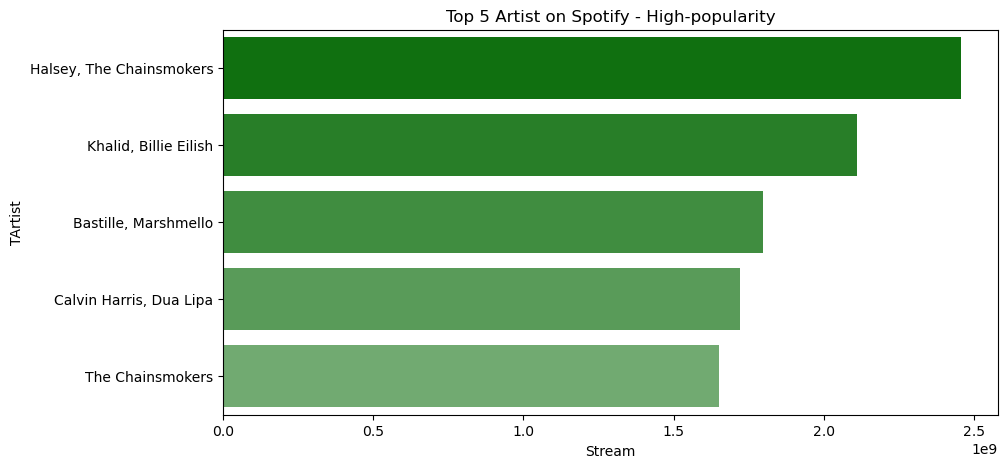

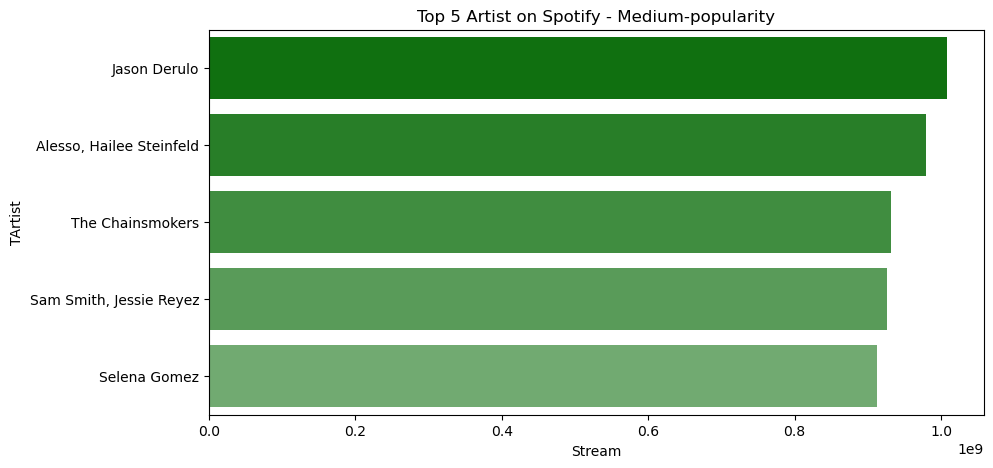

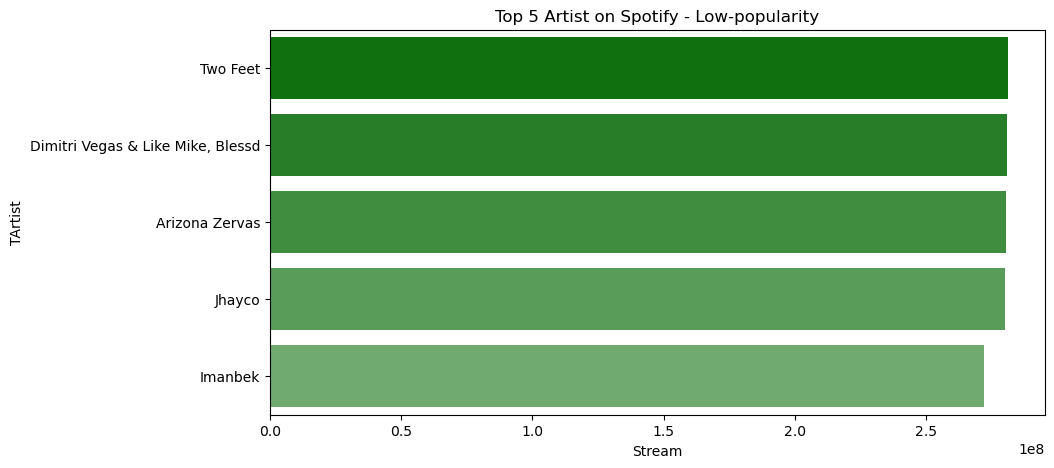

In [120]:

spotify_palette = sns.light_palette("green", n_colors=10, reverse=True)

for group in df_cleaned['Popularity_Index'].unique():
    data = df_cleaned[(df_cleaned['Popularity_Index'] == group) & (df_cleaned['Album_type'] == 'single')].copy()
    data['TArtist'] = data.groupby('Album')['Artist'].transform(lambda x: ', '.join(x.unique()))
    data = data.groupby('TArtist').Stream.max().sort_values(ascending=False).head(5).reset_index()

    if not data.empty:
        plt.figure(figsize=(10, 5))
        ax = sns.barplot(x='Stream', y='TArtist', data=data, palette=spotify_palette)
        plt.title(f'Top 5 Artist on Spotify - {group}')
        plt.show()

In [121]:
#Set color palettes for plots

# Paleta de colores verde para Spotify
spotify_palette = sns.light_palette("green", n_colors=10, reverse=True)

# Paleta de colores rojo para YouTube
youtube_palette = sns.light_palette("red", n_colors=10, reverse=True)

In [122]:
df_cleaned.columns

Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'ClusterStat1', 'Popularity_Index', 'Popular'],
      dtype='object')

In [123]:
import pandas as pd

# Assuming you have a DataFrame named df_cleaned with the specified columns
# and a 'Popularity_Index' column indicating the popularity level

# Columns to include in the pivot table
pivot_columns = ['Danceability', 'Energy',
                 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
                 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Popularity_Index', 'Popular']

# Create a pivot table
pivot_table = df_cleaned[pivot_columns].pivot_table(index='Popularity_Index', aggfunc='mean')

# Define a color gradient
color_map = 'BuGn'

# Apply the color gradient and set font color to black
styled_pivot_table = pivot_table.style.background_gradient(cmap=color_map).set_properties(**{'color': 'black', 'border-color': 'white'})

# Display the styled pivot table
styled_pivot_table


,Acousticness,Danceability,Duration_ms,Energy,Instrumentalness,Key,Liveness,Loudness,Popular,Speechiness,Tempo,Valence
Popularity_Index,,,,,,,,,,,,
High-popularity,0.200370,0.670002,218851.593807,0.666989,0.006741,5.264117,0.177439,-5.888568,1.000000,0.092588,119.771310,0.524721
Low-popularity,0.305142,0.613373,224435.392968,0.627677,0.064989,5.289895,0.193275,-7.951486,0.000000,0.095451,120.468558,0.529215
Medium-popularity,0.224812,0.651793,226291.964286,0.667370,0.015883,5.315163,0.183607,-6.339129,1.000000,0.095842,121.486427,0.528574


## MODELS

## Neural Network

In [124]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


df_high_popularity = df_cleaned
print(df_cleaned.shape)

X = df_high_popularity[['Danceability',
                        'Energy',
                        'Key',
                        'Loudness',
                        'Speechiness', 
                        'Acousticness',
                        'Instrumentalness',
                        'Liveness', 
                        'Valence', 
                        'Tempo', 
                        'Duration_ms']]
y = df_high_popularity['Popular'] 

scaler_nn = StandardScaler()
X_scaled_nn = scaler_nn.fit_transform(X)


X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled_nn, y, test_size=0.2, random_state=1)


model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, activation='relu', solver='adam', random_state=1)


model.fit(X_train_nn, y_train_nn)
print(X_train_nn.shape)

y_pred_nn = model.predict(X_test_nn)


(19526, 26)


(15620, 11)


In [125]:
# Evaluate the model
accuracy_nn = accuracy_score(y_test_nn, y_pred_nn)

print(f'Accuracy on the test set: {accuracy_nn * 100:.2f}%')
print('\nClassification Report:')
print(classification_report(y_test_nn, y_pred_nn))

Accuracy on the test set: 77.98%

Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.91      0.87      3195
        True       0.33      0.21      0.26       711

    accuracy                           0.78      3906
   macro avg       0.59      0.56      0.56      3906
weighted avg       0.75      0.78      0.76      3906



Old songs that are predicted to be famous now

In [126]:

X_old_songs = test_rows[['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness',
                             'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']]
X_old_songs_scaled = scaler_nn.transform(X_old_songs)  

y_pred_old_songs = model.predict(X_old_songs_scaled)

popular_songs_details = []

for index, predicted_popularity in enumerate(y_pred_old_songs):
    if predicted_popularity:
        popular_song_details = test_rows.iloc[index]
        
        popular_songs_details.append(popular_song_details)

popular_songs_df = pd.DataFrame(popular_songs_details)


print("Details of Popular Songs:")
popular_songs_df


Details of Popular Songs:


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
101,Michael Jackson,Chicago,XSCAPE,album,1,1,7,-3,0,0,...,176,245507,Michael Jackson - Chicago,MJ4481,545655,7314,386,False,False,103974637
103,Michael Jackson,Smooth Criminal - 2012 Remaster,Bad (Remastered),album,1,1,8,-4,0,0,...,118,257760,Michael Jackson - Smooth Criminal (Single Vers...,vman,84652754,672624,25952,False,False,526030670
104,Michael Jackson,Rock with You - Single Version,Off the Wall,album,1,1,1,-13,0,0,...,114,220627,Michael Jackson - Rock With You (Official Video),michaeljacksonVEVO,301845823,2269865,87490,True,True,346137424
105,Michael Jackson,Don't Stop 'Til You Get Enough,Off the Wall,album,1,1,11,-10,0,0,...,119,365467,Michael Jackson - Don’t Stop 'Til You Get Enou...,michaeljacksonVEVO,349102050,2254295,89160,True,True,389644450
106,Michael Jackson,They Don't Care About Us,"HIStory - PAST, PRESENT AND FUTURE - BOOK I",album,1,1,0,-6,0,0,...,90,284160,Michael Jackson - They Don’t Care About Us (Br...,michaeljacksonVEVO,978680025,8312571,335112,True,True,256361972
108,Michael Jackson,The Way You Make Me Feel - 2012 Remaster,Bad (Remastered),album,1,1,1,-5,0,0,...,114,298120,Michael Jackson - The Way You Make Me Feel (Of...,michaeljacksonVEVO,436325398,2515830,94765,True,True,349629692
225,2Pac,Changes,Greatest Hits,compilation,1,1,7,-6,0,0,...,111,268827,2pac - Changes Original Music Video,The Best,306542,4350,305,False,False,411056377
226,2Pac,Dear Mama,Me Against The World,album,1,1,6,-7,0,0,...,84,280000,2Pac - Dear Mama,2PacVEVO,381061439,3225481,134343,True,True,243928109
1508,Black Sabbath,Iron Man - 2012 - Remaster,Paranoid (Remaster),album,0,1,9,-11,0,0,...,156,355304,"BLACK SABBATH - ""Iron Man"" (Official Video)",Black Sabbath,44231930,371999,11939,True,True,NaN
10613,Led Zeppelin,Kashmir - Remaster,Physical Graffiti (Deluxe Edition),album,0,1,2,-9,0,0,...,81,517125,Led Zeppelin - Kashmir (Live from Celebration ...,Led Zeppelin,130981397,721543,52707,True,True,250248895


In [127]:

conf_matrix_high = confusion_matrix(y_test_nn, y_pred_nn)

print('Confusion Matrix for High Popularity:')
conf_matrix_high

Confusion Matrix for High Popularity:


array([[2897,  298],
       [ 562,  149]])

## KNN

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'ClusterStat1' is the column you want to predict
predictor_columns = ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 
                      'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 
                      'Tempo', 'Duration_ms']

outcome_column = 'Popular'

# Partition the data into train and valid. Make sure you set seed
trainData = df_cleaned[predictor_columns].sample(frac=0.2, random_state=2)
# Sample 40% of the row IDs into the validation set
validData = df_cleaned.drop(trainData.index)[outcome_column]
print(trainData.shape)
print(validData.shape)

# Use StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(trainData)

# Transform the entire dataset using the trained scaler
music_norm = pd.DataFrame(
    scaler.transform(df_cleaned[predictor_columns]),
    columns=['z' + col for col in df_cleaned[predictor_columns].columns]
)
music_norm[outcome_column] = df_cleaned[outcome_column]

# Reset the index of trainData and train_norm
trainData.reset_index(drop=True, inplace=True)
train_norm = music_norm.iloc[trainData.index].reset_index(drop=True)
print("Shape of train_norm:", train_norm.shape)
validData.reset_index(drop=True, inplace=True)
valid_norm = music_norm.iloc[validData.index].reset_index(drop=True)
print("Shape of valid_norm:", valid_norm.shape)



(3905, 11)
(15621,)
Shape of train_norm: (3905, 12)
Shape of valid_norm: (15621, 12)


In [129]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

predictor_columns = ['zDanceability', 'zEnergy', 'zKey', 'zLoudness', 'zSpeechiness', 
                     'zAcousticness', 'zInstrumentalness', 'zLiveness', 'zValence', 
                     'zTempo', 'zDuration_ms']


new_track = pd.DataFrame([
    {'Danceability': 0.75, 'Energy': 0.8, 'Key': 5, 'Loudness': -8, 'Speechiness': 0.1,
     'Acousticness': 0.2, 'Instrumentalness': 0.05, 'Liveness': 0.15, 'Valence': 0.7,
     'Tempo': 120, 'Duration_ms': 180000}
])


scaler = StandardScaler()


scaler.fit(trainData)


new_track_norm = pd.DataFrame(
    scaler.transform(new_track),
    columns=['z' + col for col in new_track.columns]
)


knn = NearestNeighbors(n_neighbors=3)
knn.fit(train_norm[predictor_columns].values)


distances, indices = knn.kneighbors(new_track_norm)


nearest_neighbors_data = train_norm.iloc[np.array(indices).flatten(), :]

print(nearest_neighbors_data)


      zDanceability  zEnergy  zKey  zLoudness  zSpeechiness  zAcousticness  \
2062              1        0    -0          0            -1             -0   
2598              0        1     0          0            -0             -1   
3625              1        1    -0          1            -0             -0   

      zInstrumentalness  zLiveness  zValence  zTempo  zDuration_ms Popular  
2062                 -0         -0         1       0            -0   False  
2598                 -0         -1         1       0            -0   False  
3625                 -0         -0         1      -0            -0     NaN  


/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning:

X has feature names, but NearestNeighbors was fitted without feature names



## LOGIT

In [130]:
from sklearn.model_selection import train_test_split


predictor_columns = ['Danceability', 'Loudness', 'Tempo', 'Duration_ms']

outcome_column = 'Popular'

X = df_cleaned[predictor_columns]
y = df_cleaned[outcome_column]


X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [132]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

## Logit- important features

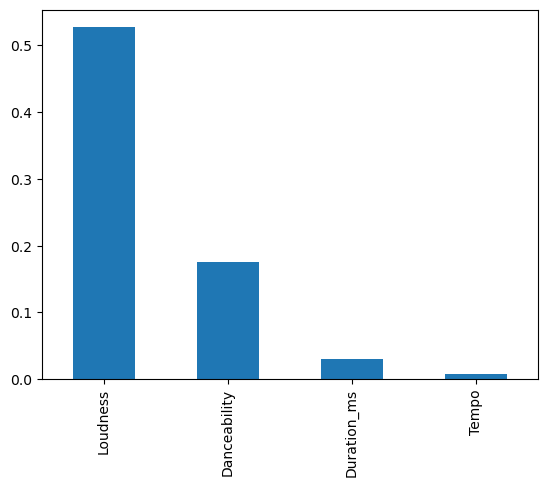

In [133]:
import matplotlib.pyplot as plt

# Get feature importance
coef = model.coef_[0]
feature_importance = pd.Series(coef, index=predictor_columns)

# Plot feature importance
feature_importance.sort_values(ascending=False).plot(kind='bar')
plt.show()


In [134]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the validation set
y_pred = model.predict(X_valid_scaled)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8069636456733231
Confusion Matrix:
[[3152    0]
 [ 754    0]]
Classification Report:
              precision    recall  f1-score   support

       False       0.81      1.00      0.89      3152
        True       0.00      0.00      0.00       754

    accuracy                           0.81      3906
   macro avg       0.40      0.50      0.45      3906
weighted avg       0.65      0.81      0.72      3906



/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/prasadpilankar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Testing old songs - Logit

In [135]:
predictor_columns = ['Danceability', 'Loudness', 'Tempo', 'Duration_ms']

outcome_column = 'Popular'


X_old_songs = test_rows[predictor_columns]

# Use the same scaler instance used for training
X_old_songs_scaled = scaler.transform(X_old_songs)

y_pred_old_songs = model.predict(X_old_songs_scaled)
y_pred_old_songs



for index, predicted_popularity in enumerate(y_pred_old_songs):
    if predicted_popularity:
        popular_song_details = test_rows.iloc[index]
        popular_songs_details.append(popular_song_details)


popular_songs_df = pd.DataFrame(popular_songs_details)


print("Details of Popular Songs:")
popular_songs_df


Details of Popular Songs:


,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
101,Michael Jackson,Chicago,XSCAPE,album,1,1,7,-3,0,0,...,176,245507,Michael Jackson - Chicago,MJ4481,545655,7314,386,False,False,103974637
103,Michael Jackson,Smooth Criminal - 2012 Remaster,Bad (Remastered),album,1,1,8,-4,0,0,...,118,257760,Michael Jackson - Smooth Criminal (Single Vers...,vman,84652754,672624,25952,False,False,526030670
104,Michael Jackson,Rock with You - Single Version,Off the Wall,album,1,1,1,-13,0,0,...,114,220627,Michael Jackson - Rock With You (Official Video),michaeljacksonVEVO,301845823,2269865,87490,True,True,346137424
105,Michael Jackson,Don't Stop 'Til You Get Enough,Off the Wall,album,1,1,11,-10,0,0,...,119,365467,Michael Jackson - Don’t Stop 'Til You Get Enou...,michaeljacksonVEVO,349102050,2254295,89160,True,True,389644450
106,Michael Jackson,They Don't Care About Us,"HIStory - PAST, PRESENT AND FUTURE - BOOK I",album,1,1,0,-6,0,0,...,90,284160,Michael Jackson - They Don’t Care About Us (Br...,michaeljacksonVEVO,978680025,8312571,335112,True,True,256361972
108,Michael Jackson,The Way You Make Me Feel - 2012 Remaster,Bad (Remastered),album,1,1,1,-5,0,0,...,114,298120,Michael Jackson - The Way You Make Me Feel (Of...,michaeljacksonVEVO,436325398,2515830,94765,True,True,349629692
225,2Pac,Changes,Greatest Hits,compilation,1,1,7,-6,0,0,...,111,268827,2pac - Changes Original Music Video,The Best,306542,4350,305,False,False,411056377
226,2Pac,Dear Mama,Me Against The World,album,1,1,6,-7,0,0,...,84,280000,2Pac - Dear Mama,2PacVEVO,381061439,3225481,134343,True,True,243928109
1508,Black Sabbath,Iron Man - 2012 - Remaster,Paranoid (Remaster),album,0,1,9,-11,0,0,...,156,355304,"BLACK SABBATH - ""Iron Man"" (Official Video)",Black Sabbath,44231930,371999,11939,True,True,NaN
10613,Led Zeppelin,Kashmir - Remaster,Physical Graffiti (Deluxe Edition),album,0,1,2,-9,0,0,...,81,517125,Led Zeppelin - Kashmir (Live from Celebration ...,Led Zeppelin,130981397,721543,52707,True,True,250248895
